# A1
## Part 1 - Reading in an audio file

In [9]:
import sys
import os
import numpy as np

sys.path.append('../../software/models/')
from utilFunctions import wavread, wavwrite
import loadTestCases
import matplotlib.pyplot as plt
%matplotlib inline

Write a function that reads an audio file and returns 10 consecutive samples of the file starting from 
the 50001th sample. This means that the output should exactly contain the 50001th sample to the 50010th 
sample (10 samples). 

The input to the function is the file name (including the path) and the output should be a numpy array 
containing 10 samples.

If you use the `wavread` function from the `utilFunctions` module the input samples will be automatically 
converted to floating point numbers with a range from -1 to 1, which is what we want. 

Remember that in python, the index of the first sample of an array is 0 and not 1.

In [8]:
def readAudio(inputFile):
    """
    Input:
        inputFile: the path to the wav file      
    Output:
        The function should return a numpy array that contains 10 samples of the audio.
    """
    ## Your code here
    fs, x = wavread(inputFile)
    
    num_samples = 10
    return x[50000:50000+num_samples]

If you run your code using `piano.wav` as the input, the function should return the following 10 samples:

```
array([-0.06213569, -0.04541154, -0.02734458, -0.0093997 ,  0.00769066,	0.02319407,  0.03503525, 0.04309214, 0.04626606,  0.0441908], dtype=float32)
```

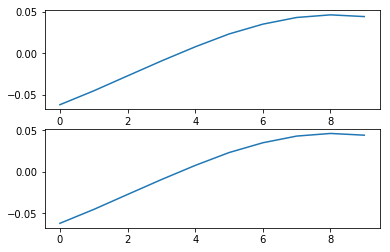

In [12]:
## Your code here

# test
y = np.array([-0.06213569, -0.04541154, -0.02734458,-0.0093997,0.00769066,    
               0.02319407,  0.03503525, 0.04309214, 0.04626606,  0.0441908])

x = readAudio('../../sounds/piano.wav')

plt.subplot(2,1,1)
plt.plot(y)

plt.subplot(2,1,2)
plt.plot(x)
plt.show()

## Part 2 - Basic operations with audio

Write a function that reads an audio file and returns the minimum and the maximum values of the audio 
samples in that file. 

The input to the function is the wav file name (including the path) and the output should be two floating 
point values returned as a tuple.

In [15]:
def minMaxAudio(inputFile):
    """
    Input:
        inputFile: file name of the wav file (including path)
    Output:
        A tuple of the minimum and the maximum value of the audio samples, like: (min_val, max_val)
    """
    ## Your code here
    fs, x = wavread(inputFile)
    
    min_val = min(x)
    max_val = max(x)
    
    return (min_val, max_val)

If you run your code using `oboe-A4.wav` as the input, the function should return the following output: 

```
(-0.83486432, 0.56501967)
```

In [16]:
## Your code here
x = minMaxAudio('../../sounds/oboe-A4.wav')
print(x)

(-0.8348643, 0.56501967)


## Part 3 - Python array indexing

Write a function that given a numpy array `x`, returns every Mth element in `x`, starting from the 
first element.  

The input arguments to this function are a numpy array `x` and a positive integer `M` such that `M` < number of 
elements in `x`. The output of this function should be a numpy array.

In [19]:
def hopSamples(x,M):
    """
    Inputs:
        x: input numpy array
        M: hop size (positive integer)
    Output:
        A numpy array containing every Mth element in x, starting from the first element in x.
    """
    ## Your code here
    return x[0::M]

If you run your code with `x = np.arange(10)` and `M = 2`, the function should return the following output: 

```
array([0, 2, 4, 6, 8])
```

In [20]:
## Your code here
x = np.arange(10)
hop_samples = hopSamples(x, 2)
print(hop_samples)

[0 2 4 6 8]


## Part 4 - Downsampling


One of the required processes to represent a signal inside a computer is sampling. The sampling rate is the number of samples obtained in one second when sampling a continuous analog signal to a discrete digital signal. As mentioned earlier, most of the time we will be working with wav audio files that have a sampling rate of 44100 Hz, which is a typical value. For some applications, changing the sampling rate of an audio signal can be necessary. This optional part shows how to do this, from a higher sampling rate to a lower one.

Complete the function `downsampleAudio(inputFile,M`) so that given an audio file, it applies downsampling by a factor of `M` and create a wav audio file `<input_name>_downsampled.wav` at a lower sampling rate.

In Part1 you learned how to read a wav file and the function from Part3 can be used to perform the downsampling of a signal contained in an array. To create a wav audio file from an array, you can use the `wavwrite` function from the `utilFunctions` module. Be careful with the sampling rate parameter since it should be different from that of the original audio.

In [24]:
def downsampleAudio(inputFile, M):
    """
    Inputs:
        inputFile: file name of the wav file (including path)
        	M: downsampling factor (positive integer)
    """
    ## Your code here
    fs, x = wavread(inputFile)
    downsampled_x = hopSamples(x, M)
    
    # save the downsampled audio
    basename = os.path.basename(inputFile)
    input_name = os.path.splitext(basename)[0]
    output_name = input_name + '_downsampled.wav'
    wavwrite(downsampled_x, fs, output_name)

You can test your code using the file `vibraphone-C6.wav` and a downsampling factor of `M=16`. 
Listen to the `vibraphone-C6_downsampled.wav` sound. What happened to the signal?
How could we avoid damaging the signal when downsampling it?

You can find some related information in https://en.wikipedia.org/wiki/Decimation_%28signal_processing%29.

In [27]:
## Your code here
import IPython
downsampled_x = downsampleAudio('../../sounds/vibraphone-C6.wav', 16)

# play the orignal signal
fs, orig_x = wavread('../../sounds/vibraphone-C6.wav')
IPython.display.Audio(orig_x, rate=fs)

In [37]:
# player the downsampled version
fs, downsampled_x = wavread('vibraphone-C6_downsampled.wav')
IPython.display.Audio(downsampled_x, rate=fs)